<a href="https://colab.research.google.com/github/drcrajc/iu_python_asssignment_task/blob/main/cyril_python_assignment_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Load datasets
ideal_df = pd.read_csv("/content/drive/MyDrive/iubh_python_assign/dataset/ideal.csv")
test_df = pd.read_csv("/content/drive/MyDrive/iubh_python_assign/dataset/test.csv")
train_df = pd.read_csv("/content/drive/MyDrive/iubh_python_assign/dataset/train.csv")
print("Datasets loaded successfully")

Datasets loaded successfully


In [22]:
# Prepare training and test data
X_train = train_df["x"].values.reshape(-1, 1)
y_train = train_df.drop(columns=["x"]).values.ravel()
X_test = test_df["x"].values.reshape(-1, 1)
print("Training and test data prepared")

Training and test data prepared


In [23]:
# Define a function to fit models and calculate SSD
def fit_and_evaluate_model(model, model_name):
    models = []
    ssds = []

    for i in range(1, 51):
        y_ideal = ideal_df[f"y{i}"].values.ravel()
        model.fit(X_train, y_ideal)
        y_pred = model.predict(X_train)
        ssd = np.sum((y_pred - y_ideal)**2)  # Use y_ideal instead of y_train for SSD calculation
        models.append(model)
        ssds.append(ssd)
        print(f"{model_name} Model {i} fitted with SSD: {ssd}")

    return models, ssds

In [24]:
# Define a function to fit neural networks and calculate SSD
def fit_and_evaluate_nn():
    models = []
    ssds = []

    for i in range(1, 51):
        y_ideal = ideal_df[f"y{i}"].values.ravel()
        model = Sequential()
        model.add(Dense(64, input_dim=1, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(X_train, y_ideal, epochs=100, verbose=0)
        y_pred = model.predict(X_train).flatten()
        ssd = np.sum((y_pred - y_ideal)**2)  # Use y_ideal instead of y_train for SSD calculation
        models.append(model)
        ssds.append(ssd)
        print(f"Neural Network Model {i} fitted with SSD: {ssd}")

    return models, ssds


In [25]:
# Fit and evaluate models
#Linear Regression
linear_models, linear_ssds = fit_and_evaluate_model(LinearRegression(), "Linear Regression")

Linear Regression Model 1 fitted with SSD: 195.89127153983014
Linear Regression Model 2 fitted with SSD: 202.88007442165565
Linear Regression Model 3 fitted with SSD: 195.89127977117153
Linear Regression Model 4 fitted with SSD: 202.88007658771272
Linear Regression Model 5 fitted with SSD: 195.89127977117153
Linear Regression Model 6 fitted with SSD: 195.89127153983014
Linear Regression Model 7 fitted with SSD: 207.93388321864552
Linear Regression Model 8 fitted with SSD: 205.57669193576
Linear Regression Model 9 fitted with SSD: 811.520294250026
Linear Regression Model 10 fitted with SSD: 25195.488998086155
Linear Regression Model 11 fitted with SSD: 1.770475427438109e-26
Linear Regression Model 12 fitted with SSD: 9.91680468256775e-25
Linear Regression Model 13 fitted with SSD: 8.068384569632555e-25
Linear Regression Model 14 fitted with SSD: 1.770475427438109e-26
Linear Regression Model 15 fitted with SSD: 5.729700123165455e-26
Linear Regression Model 16 fitted with SSD: 5688711.112

In [26]:
#Random Forest Regression
rf_models, rf_ssds = fit_and_evaluate_model(RandomForestRegressor(n_estimators=100, random_state=0), "Random Forest")

Random Forest Model 1 fitted with SSD: 0.07863130045085402
Random Forest Model 2 fitted with SSD: 0.07434903588049785
Random Forest Model 3 fitted with SSD: 0.07863101703871414
Random Forest Model 4 fitted with SSD: 0.07434903136820054
Random Forest Model 5 fitted with SSD: 0.07863101703871414
Random Forest Model 6 fitted with SSD: 0.07863130045085402
Random Forest Model 7 fitted with SSD: 0.01799577703259833
Random Forest Model 8 fitted with SSD: 56.03880737801869
Random Forest Model 9 fitted with SSD: 0.29739613335081583
Random Forest Model 10 fitted with SSD: 11.410277074898133
Random Forest Model 11 fitted with SSD: 0.15062999999998108
Random Forest Model 12 fitted with SSD: 1.3556700000005806
Random Forest Model 13 fitted with SSD: 0.6025199999999493
Random Forest Model 14 fitted with SSD: 0.15062999999998108
Random Forest Model 15 fitted with SSD: 0.03765749999999188
Random Forest Model 16 fitted with SSD: 86.23503289999897
Random Forest Model 17 fitted with SSD: 86.2350328999989

In [27]:
#Support Vector Regression
svr_models, svr_ssds = fit_and_evaluate_model(SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1), "SVR")

SVR Model 1 fitted with SSD: 2.0307636975962433
SVR Model 2 fitted with SSD: 2.0040030262303263
SVR Model 3 fitted with SSD: 2.0330760323116537
SVR Model 4 fitted with SSD: 2.000367339733538
SVR Model 5 fitted with SSD: 2.030808464966585
SVR Model 6 fitted with SSD: 2.032309022130132
SVR Model 7 fitted with SSD: 2.4144106869449713
SVR Model 8 fitted with SSD: 206.66118517020465
SVR Model 9 fitted with SSD: 2.0066297560304496
SVR Model 10 fitted with SSD: 2.1892249605938447
SVR Model 11 fitted with SSD: 2.9171940115718336
SVR Model 12 fitted with SSD: 3.3179941727833757
SVR Model 13 fitted with SSD: 3.0415790321912866
SVR Model 14 fitted with SSD: 2.9231139763940943
SVR Model 15 fitted with SSD: 3.161798015336504
SVR Model 16 fitted with SSD: 429.7785164521559
SVR Model 17 fitted with SSD: 429.7595058804981
SVR Model 18 fitted with SSD: 7319.572421304103
SVR Model 19 fitted with SSD: 429.78869863243574
SVR Model 20 fitted with SSD: 873.7617300579519
SVR Model 21 fitted with SSD: 5197329

In [28]:
#Gradient Boost Regression
gbr_models, gbr_ssds = fit_and_evaluate_model(GradientBoostingRegressor(n_estimators=100, random_state=0), "Gradient Boosting")

Gradient Boosting Model 1 fitted with SSD: 3.283063392602343
Gradient Boosting Model 2 fitted with SSD: 3.601209570442623
Gradient Boosting Model 3 fitted with SSD: 3.2830636864201503
Gradient Boosting Model 4 fitted with SSD: 3.551505235348199
Gradient Boosting Model 5 fitted with SSD: 3.2830636864201503
Gradient Boosting Model 6 fitted with SSD: 3.283063392602343
Gradient Boosting Model 7 fitted with SSD: 0.3260312012395211
Gradient Boosting Model 8 fitted with SSD: 158.18598198594418
Gradient Boosting Model 9 fitted with SSD: 14.20601912691463
Gradient Boosting Model 10 fitted with SSD: 226.8937997129728
Gradient Boosting Model 11 fitted with SSD: 2.24294725565818
Gradient Boosting Model 12 fitted with SSD: 20.18652530092435
Gradient Boosting Model 13 fitted with SSD: 8.97178902263321
Gradient Boosting Model 14 fitted with SSD: 2.24294725565818
Gradient Boosting Model 15 fitted with SSD: 0.5607368139145619
Gradient Boosting Model 16 fitted with SSD: 831.8906447746617
Gradient Boosti

In [29]:
#k-Nearest Neighbours
knn_models, knn_ssds = fit_and_evaluate_model(KNeighborsRegressor(n_neighbors=5), "KNN")

KNN Model 1 fitted with SSD: 0.05471714495987262
KNN Model 2 fitted with SSD: 0.08377948043606641
KNN Model 3 fitted with SSD: 0.054716936706780406
KNN Model 4 fitted with SSD: 0.08377949496490428
KNN Model 5 fitted with SSD: 0.054716936706780406
KNN Model 6 fitted with SSD: 0.05471714495987262
KNN Model 7 fitted with SSD: 0.00632224987447946
KNN Model 8 fitted with SSD: 168.6164733167912
KNN Model 9 fitted with SSD: 0.33511797715188085
KNN Model 10 fitted with SSD: 18.241767388924345
KNN Model 11 fitted with SSD: 0.09999999999999928
KNN Model 12 fitted with SSD: 0.9000000000000044
KNN Model 13 fitted with SSD: 0.39999999999999714
KNN Model 14 fitted with SSD: 0.09999999999999928
KNN Model 15 fitted with SSD: 0.025
KNN Model 16 fitted with SSD: 156.65939999999955
KNN Model 17 fitted with SSD: 156.65939999999955
KNN Model 18 fitted with SSD: 626.6375999999982
KNN Model 19 fitted with SSD: 156.65939999999955
KNN Model 20 fitted with SSD: 160.13939999999835
KNN Model 21 fitted with SSD: 1

In [30]:
#Neural Networks
nn_models, nn_ssds = fit_and_evaluate_nn()

13/13 [==============================] - 0s 5ms/step
Neural Network Model 1 fitted with SSD: 161.7993116162296
13/13 [==============================] - 0s 2ms/step
Neural Network Model 2 fitted with SSD: 178.40860266447652
13/13 [==============================] - 0s 2ms/step
Neural Network Model 3 fitted with SSD: 177.58173103174022
13/13 [==============================] - 0s 2ms/step
Neural Network Model 4 fitted with SSD: 165.3551191406729
13/13 [==============================] - 0s 3ms/step
Neural Network Model 5 fitted with SSD: 206.62801934104772
13/13 [==============================] - 0s 2ms/step
Neural Network Model 6 fitted with SSD: 178.8094415839945
13/13 [==============================] - 0s 6ms/step
Neural Network Model 7 fitted with SSD: 163.4844317354998
13/13 [==============================] - 0s 3ms/step
Neural Network Model 8 fitted with SSD: 203.11437528230766
13/13 [==============================] - 0s 2ms/step
Neural Network Model 9 fitted with SSD: 699.21423342220

In [31]:
# Combine all SSDs and models
all_ssds = linear_ssds + rf_ssds + svr_ssds + gbr_ssds + knn_ssds + nn_ssds
all_models = linear_models + rf_models + svr_models + gbr_models + knn_models + nn_models


In [32]:
# Prepare data for the Excel file including combined SSDs
data = {
    "Ideal Function": [f"y{i}" for i in range(1, 51)],
    "SSD of LR": linear_ssds,
    "SSD of RF": rf_ssds,
    "SSD of SVR": svr_ssds,
    "SSD of GBR": gbr_ssds,
    "SSD of kNN": knn_ssds,
    "SSD of NN": nn_ssds,
    "Combined SSDs": all_ssds[:50]  # Assuming each ideal function is fitted by each model
}


In [33]:
# Create a DataFrame
ssds_df = pd.DataFrame(data)

In [34]:
# Save the DataFrame to an Excel file
# Save the DataFrame to an Excel file
ssds_df.to_excel("ssds_values_combined.xlsx", index=False)

print("SSD values saved to 'ssds_values_combined.xlsx'")

SSD values saved to 'ssds_values_combined.xlsx'


In [35]:
# Print the SSD values
print(ssds_df)

   Ideal Function     SSD of LR     SSD of RF    SSD of SVR    SSD of GBR  \
0              y1  1.958913e+02  7.863130e-02  2.030764e+00  3.283063e+00   
1              y2  2.028801e+02  7.434904e-02  2.004003e+00  3.601210e+00   
2              y3  1.958913e+02  7.863102e-02  2.033076e+00  3.283064e+00   
3              y4  2.028801e+02  7.434903e-02  2.000367e+00  3.551505e+00   
4              y5  1.958913e+02  7.863102e-02  2.030808e+00  3.283064e+00   
5              y6  1.958913e+02  7.863130e-02  2.032309e+00  3.283063e+00   
6              y7  2.079339e+02  1.799578e-02  2.414411e+00  3.260312e-01   
7              y8  2.055767e+02  5.603881e+01  2.066612e+02  1.581860e+02   
8              y9  8.115203e+02  2.973961e-01  2.006630e+00  1.420602e+01   
9             y10  2.519549e+04  1.141028e+01  2.189225e+00  2.268938e+02   
10            y11  1.770475e-26  1.506300e-01  2.917194e+00  2.242947e+00   
11            y12  9.916805e-25  1.355670e+00  3.317994e+00  2.018653e+01   

In [36]:
# Choose the four best models based on SSD
chosen_indices = np.argsort(all_ssds)[:4]
chosen_models = [all_models[i] for i in chosen_indices]
print(f"Chosen model indices: {chosen_indices}")

Chosen model indices: [13 10 14 12]


In [37]:
# Predict on test data and evaluate
test_predictions = np.zeros((len(X_test), 4))
mse_values = []
for i, model in enumerate(chosen_models):
    test_predictions[:, i] = model.predict(X_test).flatten()
    mse = mean_squared_error(test_df["y"], test_predictions[:, i])
    mse_values.append(mse)
    print(f"Predictions from model {chosen_indices[i] + 1} completed with MSE: {mse}")

Predictions from model 14 completed with MSE: 426.19644471177133
Predictions from model 11 completed with MSE: 426.19644471177133
Predictions from model 15 completed with MSE: 426.19644471177133
Predictions from model 13 completed with MSE: 426.19644471177133


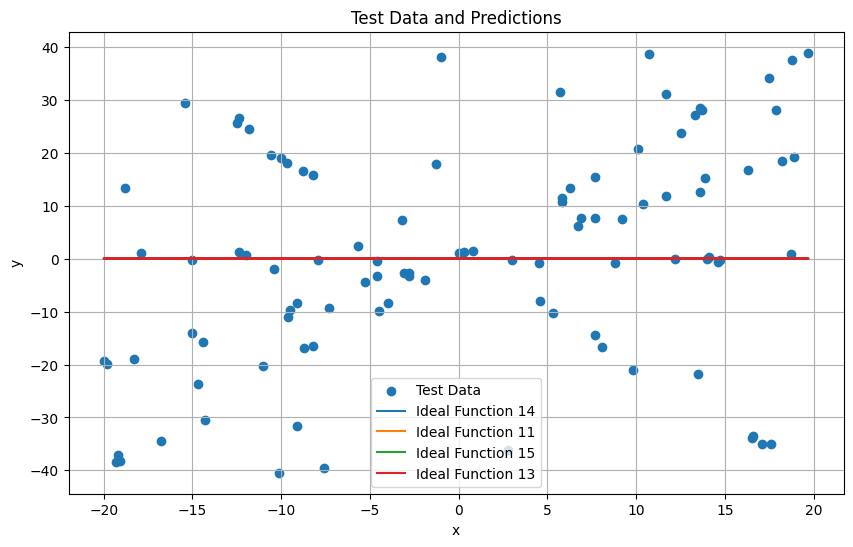

Visualization completed and saved as 'test_predictions.png'


In [38]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, test_df["y"], label="Test Data")
for i in range(4):
    plt.plot(X_test, test_predictions[:, i], label=f"Ideal Function {chosen_indices[i] + 1}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Test Data and Predictions")
plt.legend()
plt.grid(True)
plt.savefig("test_predictions.png")
plt.show()
print("Visualization completed and saved as 'test_predictions.png'")